# Introducción a Python para ciencias e ingenierías (clase 7)


Ing. Martín Gaitán

- Twitter: `@tin_nqn_`
- Email: gaitan@gmail.com

Con la participación especial de Damián Ávila  

- Twitter: `@damian_avila`
- Email: damianavila@gmail.com


**Anotate en las listas de correo**

- python.org.ar  (Python General -- Tod@s!)
- scipyla.org   (Python Científico - en portuñol/ingles)

# Profundizando en IPython / Jupyter

## Modos 

IPython Notebook tiene una intefaz de edición modal. Significa que los comandos de teclados hacen distintas cosas en función de en qué modo se encuentre de los dos disponibles: modo edición o modo comandos. 

Editores como `vim` también tienen este comportamiento. 

<div class="alert alert-success">
El modo edición se activa presionando `Enter` o haciendo click sobre una celda
</div>

En este modo, el borde de la celda es verde

<img src="img/edit_mode.png">

<div class="alert alert-success">
Apretá `Esc` o hacé click fuera de una celda para entrar en modo comando
</div>

El modo comando se denota por el boder gris:

<img src="img/command_mode.png">

Cuando se está en **modo comando**, se edita **el documento** (a través de shortcuts) y no el contenido particular de una celda. 



es mucho mas rápido ;)

<img src="img/command_shortcuts.png">

<img src="img/edit_shortcuts.png">

In [ ]:
a = 'practicar' # ! 

## Más allá de python

IPython reconoce código copiado y pegado desde una consola

In [ ]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

In [ ]:
In [12]: a = 10

In [ ]:
# %load -s run_tests https://raw.githubusercontent.com/mgaitan/waliki/master/runtests.py
def run_tests(*test_args):
    if not test_args:
        test_args = ['tests']

    # Run tests
    test_runner = NoseTestSuiteRunner(verbosity=1)

    failures = test_runner.run_tests(test_args)

    shutil.rmtree(WALIKI_DATA_DIR)
    if failures:
        sys.exit(failures)


## Más magics

Además de los magics que ya conocemos hay varios otros:

### debug y xmode

Por ejemplo, `%debug`, que activa el debugger interactivo de python: [pdb](https://docs.python.org/3.4/library/pdb.html)

In [8]:
def f(x):
    resta = 1
    return 1.0/(x-resta)

def g(y):
    return f(y+1)

In [13]:
# xmode configura el nivel de reporting de errores. El default es context
%xmode context
g(0)

Exception reporting mode: Context


ZeroDivisionError: float division by zero

In [14]:
%debug

> <ipython-input-8-4b2d20f1c31b>(3)f()
      2     resta = 1
----> 3     return 1.0/(x-resta)
      4 

ipdb> p x
1
ipdb> x
1
ipdb> x = 2
ipdb> up
> <ipython-input-8-4b2d20f1c31b>(6)g()
      4 
      5 def g(y):
----> 6     return f(y+1)

ipdb> p y
0
ipdb> c


## %run

In [15]:
%%writefile ejemplo.py

PI = 3.141592

if __name__ == '__main__':
    print("El valor de PI es {}".format(PI))


Overwriting ejemplo.py


El magic `%run` ejecuta el modulo como si lo llamasemos desde el interprete de python y a la vez importa todo el namespace

In [16]:
%run ejemplo.py

El valor de PI es 3.141592


In [17]:
PI

3.141592

In [24]:
from ejemplo import PI
PI

3.1416

In [23]:
%%writefile ejemplo.py

PI = 3.14

Overwriting ejemplo.py


In [19]:
%run ejemplo.py

In [20]:
PI

3.1416

### Comodines como ayuda memoria. 

Poner un asterisco antes y/o despues de cualquier palabra permite inspeccionar en busca de **objetos** que tengan esa palabra

In [27]:
range

In [28]:
from matplotlib import pyplot as plt

In [29]:
plt.*color*?



## Nbconvert & RISE

`NbConvert` es la biblioteca y la herramienta de linea de comandos para convertir notebooks (archivos `.ipynb`) a otros formatos. 

Por defecto, permite convertir a `html`, `latex`, `pdf`, `script`, `markdown`, `rst` y `slides` y otros formatos `custom` que se pueden crear (o instalar) porque se basan en el sistema de plantillas [Jinja](http://jinja.pocoo.org/docs/dev/). Para algunos formatos, hace falta tener la herramienta [pandoc](http://johnmacfarlane.net/pandoc/installing.html) instalada en el sistema


Podés llamar a nbconvert desde la consola

```bash
$ ipython nbconvert <opciones y argumentos>
```

Llamar `ipython nbconvert` con `--help` para recibir ayuda sobre cómo usarlo. 


El formato de conversión por defecto es HTML

In [31]:
!ipython nbconvert  'Clase 1.ipynb'

[NbConvertApp] Converting notebook Clase 1.ipynb to html
[NbConvertApp] Writing 300121 bytes to Clase 1.html


[ver resultado](Clase 1.html)

In [34]:
!ipython nbconvert --to markdown 'Clase 1.ipynb'

[NbConvertApp] Converting notebook Clase 1.ipynb to markdown
[NbConvertApp] Writing 19985 bytes to Clase 1.md


In [ ]:
!head -n 20 'Clase 1.md'

## Slides

El modo 'slides' marca cada celda con metadata para generar una presentación utilizando [reveal-js](http://lab.hakim.se/reveal-js/#/)

[Ejemplo](ejemplos/slides.ipynb)


In [35]:
!ipython nbconvert 'ejemplos/slides.ipynb' --to slides --post serve

[NbConvertApp] Converting notebook ejemplos/slides.ipynb to slides
[NbConvertApp] Writing 209240 bytes to slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdn.jsdelivr.net/reveal.js/2.6.2
Serving your slides at http://127.0.0.1:8000/slides.slides.html
Use Control-C to stop this server

(process:17509): GLib-CRITICAL **: g_slice_set_config: assertion 'sys_page_size == 0' failed
^C
Interrupted



Pero también está [RISE](http://github.com/damianavila/RISE): slides **en vivo**.  [Mismo ejemplo](ejemplos/slides.ipynb)

Se pueden ver y compartir notebook online via [nbviewer.ipython.org](http://nbviewer.ipython.org/), por ejemplo, pegando una url a un archivo `.ipynb`. Una forma rápida de subir archivos es a través del servicio [gist.github.com](https://gist.github.com/) donde se puede **pegar** el codigo fuente de un notebook


In [ ]:
!cat Clase\ 1.ipynb

# Contenidos enriquecidos

Además de markdown, IPython trae un paquete para mostrar contenido enriquecido. 

Esto es lo que subyace a a algunos magics

In [36]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/xbWGPGHgDX8" frameborder="0" allowfullscreen></iframe>

Pero tambien se puede mostrar **contenido enriquecido generado programáticamente**

In [37]:
from IPython.display import display, HTML

In [38]:
celdas = ''.join('</tr><td>Celda %i</td><tr>' % i for i in range(1, 4))
tabla = """<table>
<tr>
<th>Header 1</th>
%s
</tr>
</table>""" % celdas
display(HTML(tabla))

In [39]:
from IPython.display import Audio
import numpy as np
max_time = 3
f1 = 220.0
f2 = 224.0
rate = 6400.0
L = 5
times = np.linspace(0,L,rate*L)
signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)

Audio(data=signal, rate=rate)

# Interactividad enriquecida

Ipython Notebook es un entorno de computación interactiva enriquecida. Además de mostrar contenidos enriquecidos (via Markdown o programáticamente), podemos utilizar **widgets** para pasar parámetros a nuestro código. 


In [40]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [41]:
def f(x):
    print(x)

In [42]:
interact(f, x=10);

10


`interact` hace una instrospección del tipo de dato que pasamos para decidir dinámicamente qué widget usar. Por ejemplo si pasamos un booleano

In [43]:
interact(f, x=True);

False


In [44]:
interact(f, x='Hi there!');

Hi thdfdsfdsfsdf 


Hay un comportamiento especial si pasamos un iterador de strings o diccionario cuyas claves sean strings

In [45]:
interact(f, x=['peras', 'manzanas']);

peras


In [46]:
interact(f, x={'peras': 1, 'manzanas': 2});

2


`interact` también se puede usar como un decorador

In [47]:
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y)

False 0.0


Si queremos decirle a `interact` que un parámetro permanecerá fijo, hay que marcarlo con `fixed`

In [48]:
interact(g, x=5, y=fixed(20));

4 20


Por defecto, el rango numérico es (-v, +3*v)  y el paso es 1/v . Se puede sobreescribir explicitamente

In [49]:
interact(g, x=(1, 10, 2), y=fixed(20));

5 20


O siendo mucho más especificos

In [50]:
interact(g, x=widgets.FloatSlider(min=-20.0,max=30.0,step=0.2,value=10.), y=fixed(20)); 

-10.4 20


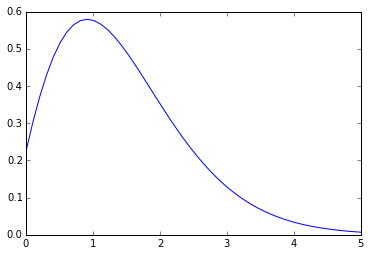

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
x = np.linspace(0,5)


@interact(n=(0, 10))
def p(n):
    f, ax = plt.subplots()
    ax.plot(x, jn(x,n))
    plt.show()

Ejemplo más lindo: sistema de ecuaciones diferenciales ordinarias de [Lorenz](http://en.wikipedia.org/wiki/Lorenz_system)

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

In [53]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames

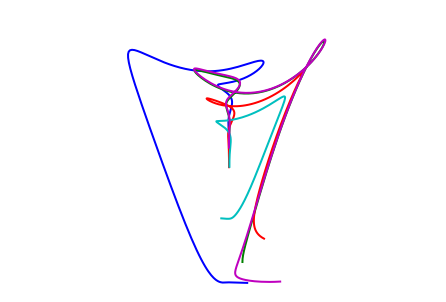

In [54]:
@interact(angle=(0.,360.), az=(0,60), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
def solve_lorenz(N=10, angle=0.0, az=30, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(az, angle)
    plt.show()

    return t, x_t